In [99]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from pandas import DataFrame

In [155]:
df = pd.read_csv('datapoints.csv', index_col=0)


mask = df.name.str.contains("BLOK61")
df_blok = df[mask]
df_videolab = df[~mask]
df_videolab_filtered = df_videolab["value"].to_numpy()




                                         name attribute_name  value
timestamp                                                          
2021-04-18 05:03:14.376  Philitelaan Videolab       occupied    3.0
2021-04-18 05:04:16.815  Philitelaan Videolab       occupied    3.0
2021-04-23 04:20:38.034  Philitelaan Videolab       occupied    5.0
2021-04-23 04:21:42.956  Philitelaan Videolab       occupied    5.0
2021-04-18 05:05:27.871  Philitelaan Videolab       occupied    3.0
...                                       ...            ...    ...
2021-05-02 04:57:04.904  Philitelaan Videolab       occupied    4.0
2021-05-02 04:58:08.602  Philitelaan Videolab       occupied    4.0
2021-05-02 04:59:08.637  Philitelaan Videolab       occupied    4.0
2021-05-02 05:00:11.026  Philitelaan Videolab       occupied    4.0
2021-05-02 05:01:18.895  Philitelaan Videolab       occupied    4.0

[38965 rows x 3 columns]


In [156]:
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>


In [157]:
split_index = math.floor(len(df)*0.8)
train, test = DataFrame(df.iloc[:split_index, -1]), DataFrame(df.iloc[split_index:, -1])
model = Holt(train, initialization_method="estimated")
model.fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)


C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [158]:


print(test["2021-04-05 02:00:00"])
pred = model.predict(start=test["2021-04-05 02:00:00"], end=test["2021-05-06 16:30:00"])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

KeyError: '2021-04-05 02:00:00'

In [53]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
df = df.resample(rule='4H', closed='left', label='left').mean().apply(np.ceil)

(array([18722., 18726., 18730., 18734., 18738., 18742., 18746., 18748.,
        18752.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

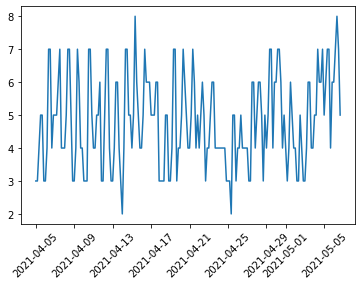

In [54]:
plt.plot(df["value"])
plt.xticks(rotation=45)